In [372]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [373]:
!ls


 tox21_10k_data_consensus_results_f1_opt.csv
 tox21_10k_data_consensus_results_no_bayes.csv
 tox21_10k_data_consensus_results_tuning.csv
 tox21_10k_data_consensus_results_tuning_f1_opt.csv
 tox21_10k_data_hitrate.csv
 tox21_10k_data_results.csv
 tox21_10k_data_results_f1_opt.csv
 tox21_10k_data_summary.csv
 tox21_10k_data_summary_f1_opt.csv
 tox21_10k_data_summary_inc_test.csv
 tox21_10k_data_summary_inc_test_with_ba_opt.csv
 tox21_10k_data_tuning_results.csv
 tox21_10k_data_tuning_results_f1_opt.csv
 tox21_10k_data_tuning_summary.csv
'Tox21 Analysis.ipynb'
 tox21_challenge_results.csv
'Tox21 Detailed Analysis.ipynb'
'Tox21 Multi Group Analysis.ipynb'
 tox21_reference_search_results.csv
 tox21_reference_search_results_f1_opt.csv
 tox21_reference_search_results_not_tuned_f1_opt.csv
 tox21_reference_search_results_parallel2.csv
 tox21_reference_search_results_parallel.csv
'Tox21 timings.ipynb'


In [374]:
#file = 'tox21_10k_data_results.csv'
#file='tox21_10k_data_results_f1_opt.csv'
#file = 'tox21_10k_data_tuning_results.csv'
file = 'tox21_10k_data_tuning_results_f1_opt.csv'
#file = 'tox21_10k_data_consensus_results_tuning_f1_opt.csv'
results = pd.read_csv(file)
results.rename(columns={'ToxAssay': 'ToxField'}, inplace=True)
training_results = results[results['Dataset'] == 'Training']
results = results[results['Dataset'].isin(['Training', 'Score'])]
score_results = results[results['Dataset'] == 'Score']

In [375]:
score_results.RocAUC.describe()

count    72.000000
mean      0.779935
std       0.076180
min       0.534402
25%       0.747804
50%       0.773879
75%       0.809718
max       0.939177
Name: RocAUC, dtype: float64

In [376]:
score_results.BA.describe()

count    72.000000
mean      0.620362
std       0.090184
min       0.493230
25%       0.555312
50%       0.609375
75%       0.675083
max       0.875716
Name: BA, dtype: float64

In [377]:
hitrate_results = training_results.copy()
hitrate_results['predicted_hitrate'] = (hitrate_results['TP'] + hitrate_results['FP'])/hitrate_results['Count']
hitrate_results['real_hitrate'] = (hitrate_results['TP'] + hitrate_results['FN'])/hitrate_results['Count']
hitrate_results

,ToxField,Method,Dataset,TP,FP,TN,FN,RocAUC,BA,f1,Precision,Recall,Specificity,Count,predicted_hitrate,real_hitrate
0,NR-AR,Weka RF classification,Training,206,68,8288,153,0.843173,0.782839,0.650869,0.751825,0.573816,0.991862,8715,0.031440,0.041193
3,NR-AR,Weka RF on folded fp classification,Training,209,113,8243,150,0.835970,0.784325,0.613803,0.649068,0.582173,0.986477,8715,0.036948,0.041193
6,NR-AR,Smile SVC RBF classification,Training,201,80,8276,158,0.816556,0.775157,0.628125,0.715302,0.559889,0.990426,8715,0.032243,0.041193
9,NR-AR,Smile SVC Tanimoto classification,Training,203,71,8285,156,0.814095,0.778481,0.641390,0.740876,0.565460,0.991503,8715,0.031440,0.041193
12,NR-AR,Smile SVC Poly classification,Training,224,602,7754,135,0.812136,0.775956,0.378059,0.271186,0.623955,0.927956,8715,0.094779,0.041193
15,NR-AR,Smile Bernoulli NB classification,Training,219,448,7908,140,0.802913,0.778207,0.426901,0.328336,0.610028,0.946386,8715,0.076535,0.041193
18,NR-AhR,Weka RF classification,Training,525,197,6506,405,0.922140,0.767563,0.635593,0.727147,0.564516,0.970610,7633,0.094589,0.121839
21,NR-AhR,Weka RF on folded fp classification,Training,516,174,6529,414,0.915730,0.764440,0.637037,0.747826,0.554839,0.974041,7633,0.090397,0.121839
24,NR-AhR,Smile SVC Tanimoto classification,Training,640,335,6368,290,0.910688,0.819097,0.671916,0.656410,0.688172,0.950022,7633,0.127735,0.121839
27,NR-AhR,Smile SVC Poly classification,Training,677,506,6197,253,0.903707,0.826234,0.640795,0.572274,0.727957,0.924511,7633,0.154985,0.121839


In [378]:
hitrate_results = hitrate_results[['ToxField', 'predicted_hitrate', 'real_hitrate']].copy()
hitrate_results = hitrate_results.set_index('ToxField').stack().reset_index().rename(columns={'level_1': 'Cat', 0:'Hitrate'})
hitrate_results[hitrate_results['Cat'] == 'real_hitrate'].drop_duplicates()

,ToxField,Cat,Hitrate
1,NR-AR,real_hitrate,0.041193
13,NR-AhR,real_hitrate,0.121839
25,NR-AR-LBD,real_hitrate,0.033854
37,NR-ER,real_hitrate,0.124724
49,NR-ER-LBD,real_hitrate,0.051166
61,NR-Aromatase,real_hitrate,0.050134
73,NR-PPAR-gamma,real_hitrate,0.025303
85,SR-ARE,real_hitrate,0.148274
97,SR-ATAD5,real_hitrate,0.039315
109,SR-HSE,real_hitrate,0.048603


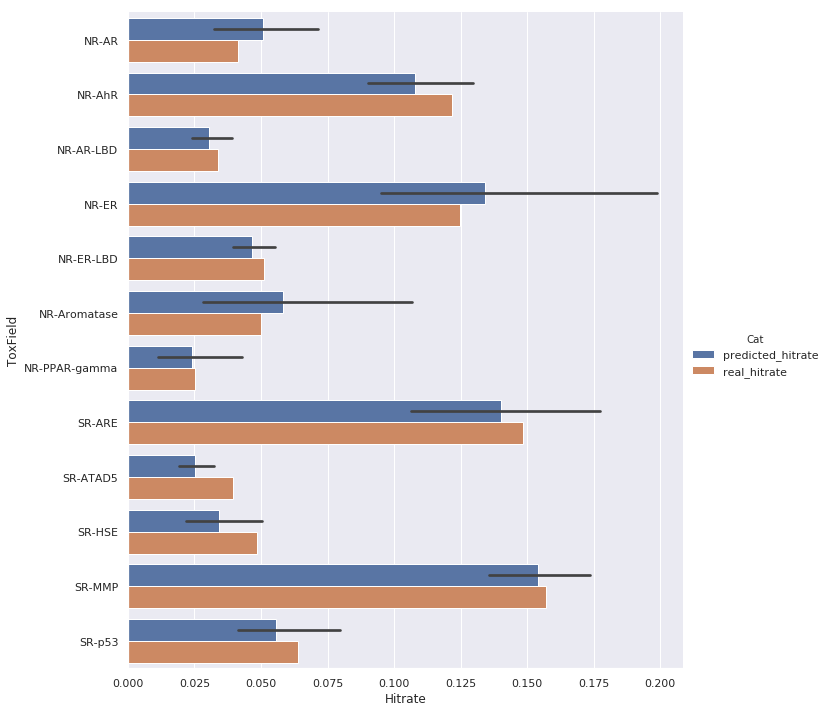

In [379]:
sns.catplot(y="ToxField", x="Hitrate", data=hitrate_results, hue='Cat', kind='bar', height=10, aspect=1.0)

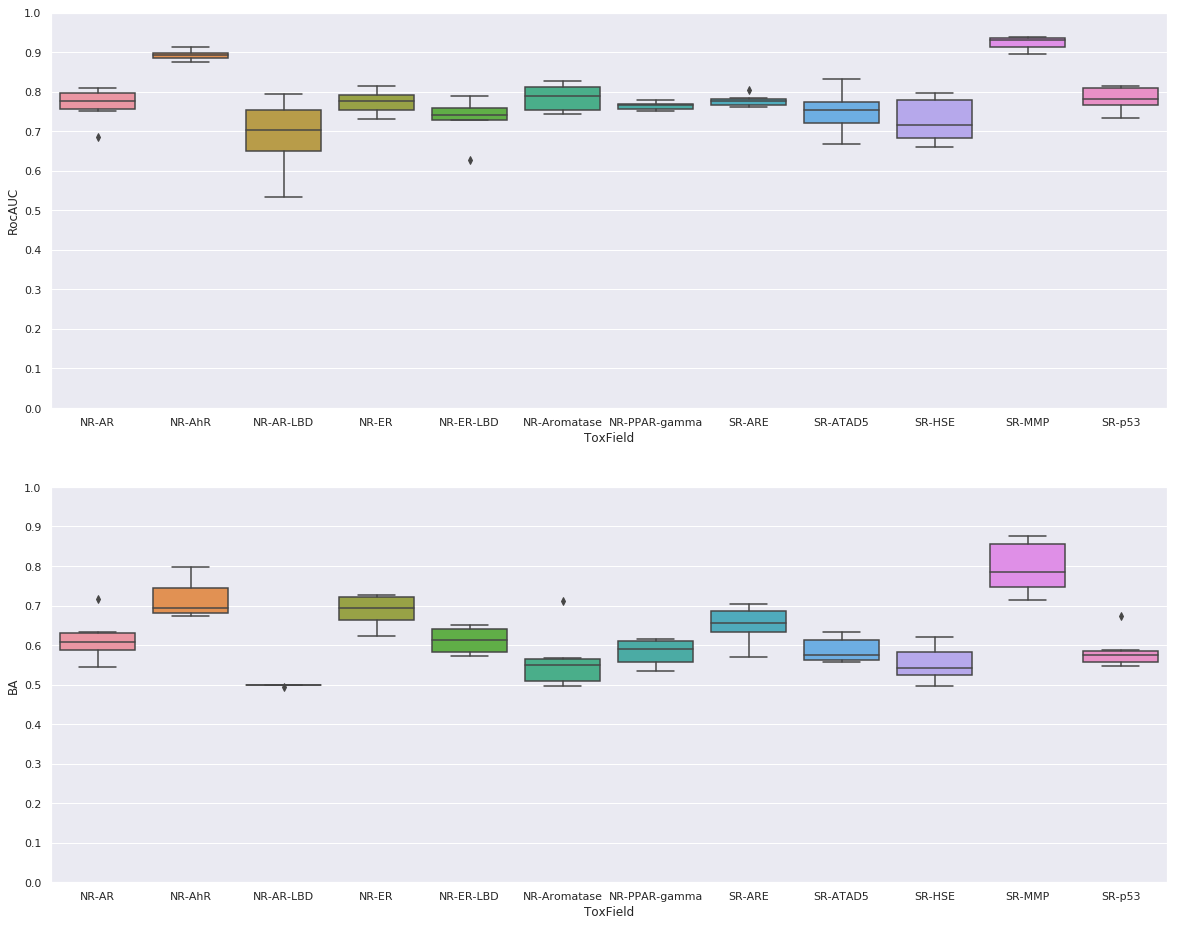

In [380]:
y_ticks = np.linspace(0, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax = sns.boxplot(x="ToxField", y="RocAUC", data=score_results, ax=ax)
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.0,1.0))
ax = sns.boxplot(x="ToxField", y="BA", data=score_results, ax=ax)

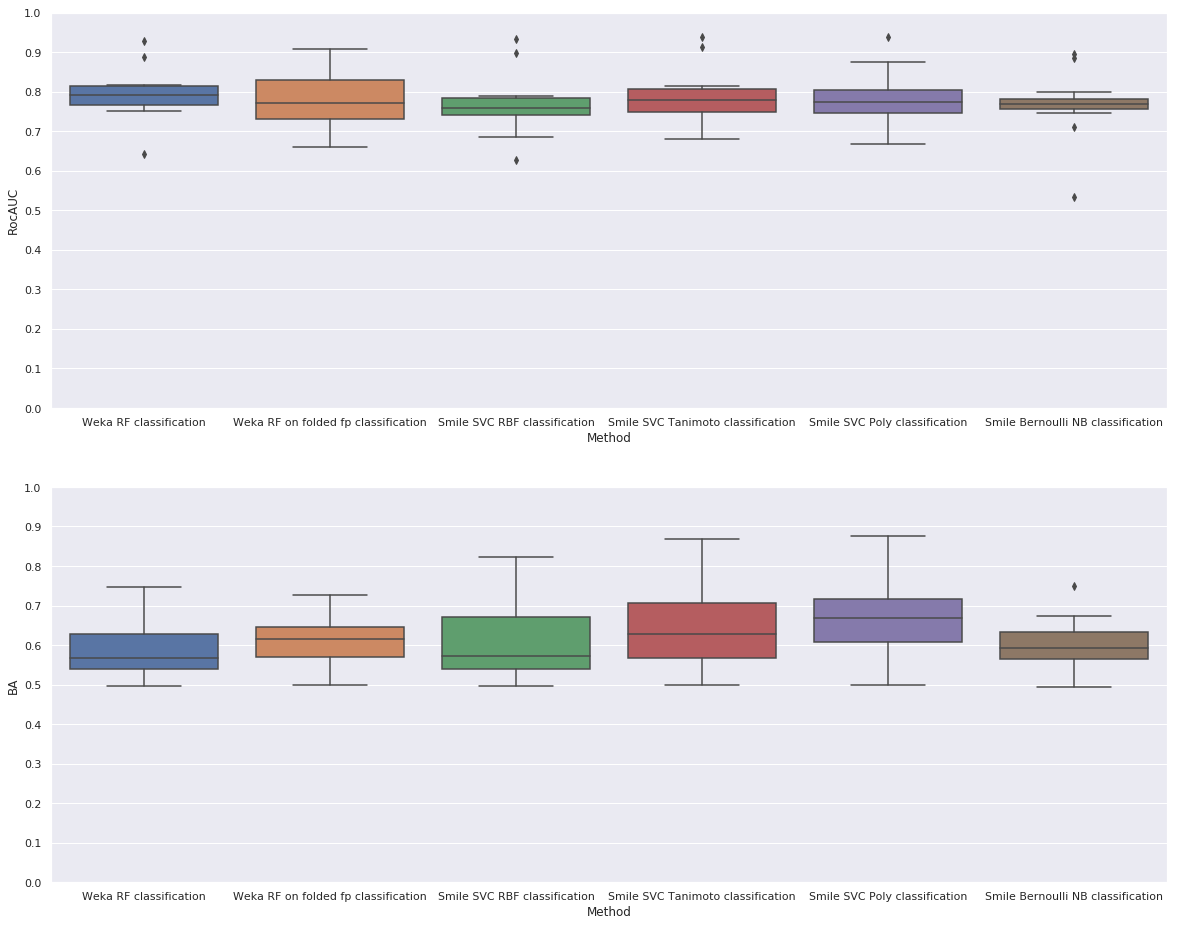

In [381]:
y_ticks = np.linspace(0, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax = sns.boxplot(x="Method", y="RocAUC", data=score_results, ax=ax)
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.0,1.0))
ax = sns.boxplot(x="Method", y="BA", data=score_results, ax=ax)

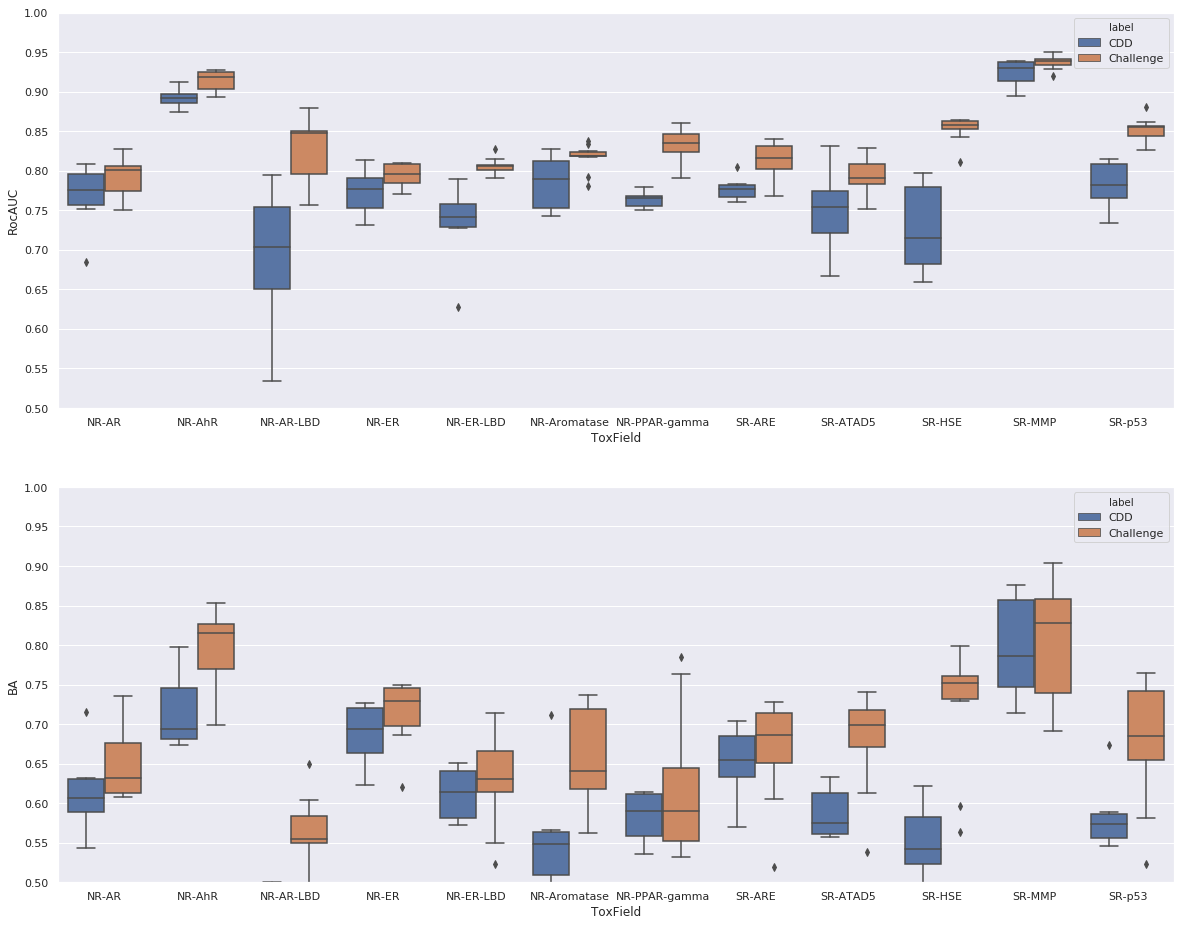

In [382]:
challenge_results = pd.read_csv('tox21_challenge_results.csv')
challenge_results.rename(columns={'AUC-ROC': 'RocAUC', 'Balanced Accuracy': 'BA', 'Team Name': 'label'}, inplace=True)
challenge_results['label']='Challenge'

score_results = score_results.copy()
score_results['label'] = 'CDD'
all_results = pd.concat([score_results, challenge_results], ignore_index=True, sort=False)

y_ticks = np.linspace(0.5, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
ax = sns.boxplot(x="ToxField", y="RocAUC", data=all_results, ax=ax, hue='label')
ax = axes[1]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.5,1.0))
ax = sns.boxplot(x="ToxField", y="BA", data=all_results, ax=ax, hue='label')

In [383]:
all_results

,ToxField,Method,Dataset,TP,FP,TN,FN,RocAUC,BA,f1,Precision,Recall,Specificity,Count,label,Rank
0,NR-AR,Weka RF classification,Score,2.0,1.0,516.0,9.0,0.751451,0.589942,0.285714,0.666667,0.181818,0.998066,528.0,CDD,NaN
1,NR-AR,Weka RF on folded fp classification,Score,3.0,4.0,513.0,8.0,0.808686,0.632495,0.333333,0.428571,0.272727,0.992263,528.0,CDD,NaN
2,NR-AR,Smile SVC RBF classification,Score,2.0,3.0,514.0,9.0,0.685071,0.588008,0.250000,0.400000,0.181818,0.994197,528.0,CDD,NaN
3,NR-AR,Smile SVC Tanimoto classification,Score,1.0,2.0,515.0,10.0,0.778266,0.543520,0.142857,0.333333,0.090909,0.996132,528.0,CDD,NaN
4,NR-AR,Smile SVC Poly classification,Score,5.0,12.0,505.0,6.0,0.801125,0.715667,0.357143,0.294118,0.454545,0.976789,528.0,CDD,NaN
5,NR-AR,Smile Bernoulli NB classification,Score,3.0,13.0,504.0,8.0,0.771848,0.623791,0.222222,0.187500,0.272727,0.974855,528.0,CDD,NaN
6,NR-AhR,Weka RF classification,Score,31.0,22.0,452.0,38.0,0.887910,0.701431,0.508197,0.584906,0.449275,0.953586,543.0,CDD,NaN
7,NR-AhR,Weka RF on folded fp classification,Score,30.0,30.0,444.0,39.0,0.896181,0.685746,0.465116,0.500000,0.434783,0.936709,543.0,CDD,NaN
8,NR-AhR,Smile SVC Tanimoto classification,Score,45.0,27.0,447.0,24.0,0.912784,0.797606,0.638298,0.625000,0.652174,0.943038,543.0,CDD,NaN
9,NR-AhR,Smile SVC Poly classification,Score,43.0,49.0,425.0,26.0,0.874197,0.759906,0.534161,0.467391,0.623188,0.896624,543.0,CDD,NaN


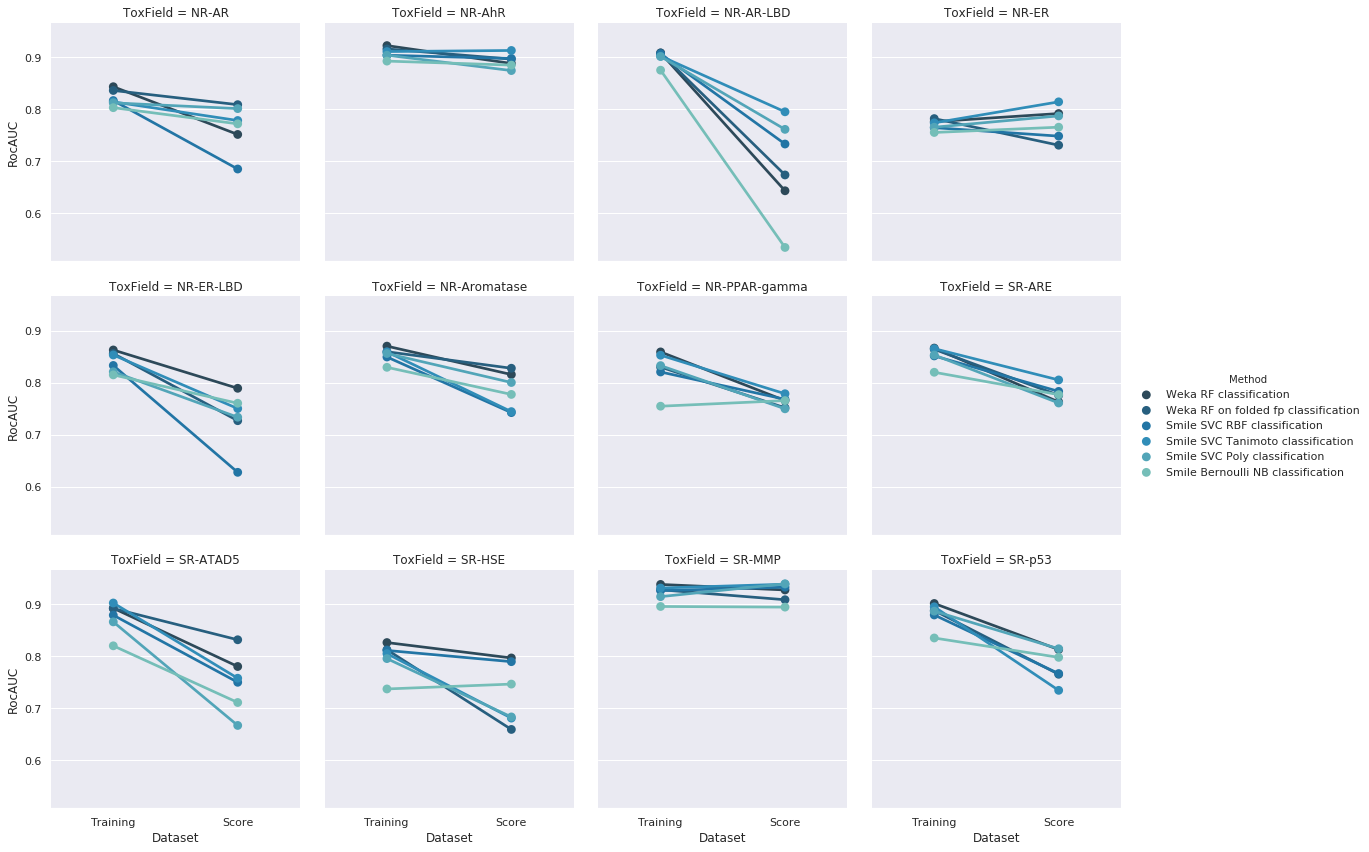

In [384]:
g = sns.catplot(x="Dataset", y="RocAUC", hue="Method", col="ToxField",
                capsize=0.1, palette="YlGnBu_d", height=4, aspect=1.0,
                kind="point", data=results, col_wrap=4)
g.despine(left=True)

In [385]:
training_best = results[results['Dataset'] == 'Training']
training_best = training_best.loc[training_best.groupby("ToxField", as_index=False)['RocAUC'].idxmax()]
training_best

,ToxField,Method,Dataset,TP,FP,TN,FN,RocAUC,BA,f1,Precision,Recall,Specificity,Count
0,NR-AR,Weka RF classification,Training,206,68,8288,153,0.843173,0.782839,0.650869,0.751825,0.573816,0.991862,8715
36,NR-AR-LBD,Weka RF classification,Training,181,50,7741,92,0.908207,0.828293,0.718254,0.783550,0.663004,0.993582,8064
18,NR-AhR,Weka RF classification,Training,525,197,6506,405,0.922140,0.767563,0.635593,0.727147,0.564516,0.970610,7633
90,NR-Aromatase,Weka RF classification,Training,127,81,6285,209,0.870229,0.682626,0.466912,0.610577,0.377976,0.987276,6702
54,NR-ER,Weka RF on folded fp classification,Training,414,293,6051,490,0.781914,0.705890,0.513966,0.585573,0.457965,0.953815,7248
72,NR-ER-LBD,Weka RF classification,Training,219,91,7679,200,0.862856,0.755481,0.600823,0.706452,0.522673,0.988288,8189
108,NR-PPAR-gamma,Weka RF classification,Training,33,22,7451,161,0.859104,0.583580,0.265060,0.600000,0.170103,0.997056,7667
126,SR-ARE,Weka RF classification,Training,429,195,5555,572,0.866512,0.697329,0.528000,0.687500,0.428571,0.966087,6751
144,SR-ATAD5,Smile SVC Tanimoto classification,Training,162,135,8051,173,0.902208,0.733545,0.512658,0.545455,0.483582,0.983508,8521
162,SR-HSE,Weka RF classification,Training,94,68,7253,280,0.826223,0.621024,0.350746,0.580247,0.251337,0.990712,7695


In [386]:
score_results = results[results['Dataset'] == 'Score'][['ToxField', 'Method', 'RocAUC']]
score_results

,ToxField,Method,RocAUC
2,NR-AR,Weka RF classification,0.751451
5,NR-AR,Weka RF on folded fp classification,0.808686
8,NR-AR,Smile SVC RBF classification,0.685071
11,NR-AR,Smile SVC Tanimoto classification,0.778266
14,NR-AR,Smile SVC Poly classification,0.801125
17,NR-AR,Smile Bernoulli NB classification,0.771848
20,NR-AhR,Weka RF classification,0.887910
23,NR-AhR,Weka RF on folded fp classification,0.896181
26,NR-AhR,Smile SVC Tanimoto classification,0.912784
29,NR-AhR,Smile SVC Poly classification,0.874197


In [387]:
training_best_with_score = training_best.merge(score_results, on=['ToxField', 'Method'],how='inner', suffixes=('_t', '_ts'))
training_best_with_score

,ToxField,Method,Dataset,TP,FP,TN,FN,RocAUC_t,BA,f1,Precision,Recall,Specificity,Count,RocAUC_ts
0,NR-AR,Weka RF classification,Training,206,68,8288,153,0.843173,0.782839,0.650869,0.751825,0.573816,0.991862,8715,0.751451
1,NR-AR-LBD,Weka RF classification,Training,181,50,7741,92,0.908207,0.828293,0.718254,0.783550,0.663004,0.993582,8064,0.643272
2,NR-AhR,Weka RF classification,Training,525,197,6506,405,0.922140,0.767563,0.635593,0.727147,0.564516,0.970610,7633,0.887910
3,NR-Aromatase,Weka RF classification,Training,127,81,6285,209,0.870229,0.682626,0.466912,0.610577,0.377976,0.987276,6702,0.815685
4,NR-ER,Weka RF on folded fp classification,Training,414,293,6051,490,0.781914,0.705890,0.513966,0.585573,0.457965,0.953815,7248,0.730811
5,NR-ER-LBD,Weka RF classification,Training,219,91,7679,200,0.862856,0.755481,0.600823,0.706452,0.522673,0.988288,8189,0.789271
6,NR-PPAR-gamma,Weka RF classification,Training,33,22,7451,161,0.859104,0.583580,0.265060,0.600000,0.170103,0.997056,7667,0.765695
7,SR-ARE,Weka RF classification,Training,429,195,5555,572,0.866512,0.697329,0.528000,0.687500,0.428571,0.966087,6751,0.762994
8,SR-ATAD5,Smile SVC Tanimoto classification,Training,162,135,8051,173,0.902208,0.733545,0.512658,0.545455,0.483582,0.983508,8521,0.757719
9,SR-HSE,Weka RF classification,Training,94,68,7253,280,0.826223,0.621024,0.350746,0.580247,0.251337,0.990712,7695,0.796638


In [388]:
score_best = results[results['Dataset'] == 'Score']
score_best = score_best.loc[score_best.groupby("ToxField", as_index=False)['RocAUC'].idxmax()]
score_best

,ToxField,Method,Dataset,TP,FP,TN,FN,RocAUC,BA,f1,Precision,Recall,Specificity,Count
5,NR-AR,Weka RF on folded fp classification,Score,3,4,513,8,0.808686,0.632495,0.333333,0.428571,0.272727,0.992263,528
47,NR-AR-LBD,Smile SVC Tanimoto classification,Score,0,1,516,7,0.794971,0.499033,0.000000,0.000000,0.000000,0.998066,524
26,NR-AhR,Smile SVC Tanimoto classification,Score,45,27,447,24,0.912784,0.797606,0.638298,0.625000,0.652174,0.943038,543
95,NR-Aromatase,Weka RF on folded fp classification,Score,5,8,435,28,0.827758,0.566728,0.217391,0.384615,0.151515,0.981941,476
62,NR-ER,Smile SVC Tanimoto classification,Score,25,35,383,23,0.814095,0.718551,0.462963,0.416667,0.520833,0.916268,466
74,NR-ER-LBD,Weka RF classification,Score,3,3,517,16,0.789271,0.576063,0.240000,0.500000,0.157895,0.994231,539
113,NR-PPAR-gamma,Smile SVC Tanimoto classification,Score,5,15,497,23,0.778809,0.574637,0.208333,0.250000,0.178571,0.970703,540
131,SR-ARE,Smile SVC Tanimoto classification,Score,48,64,345,37,0.805278,0.704113,0.487310,0.428571,0.564706,0.843521,494
152,SR-ATAD5,Weka RF on folded fp classification,Score,5,1,521,29,0.831587,0.572572,0.250000,0.833333,0.147059,0.998084,556
164,SR-HSE,Weka RF classification,Score,0,4,524,16,0.796638,0.496212,0.000000,0.000000,0.000000,0.992424,544


In [389]:
comparison = training_best_with_score.merge(score_best, on=['ToxField'], suffixes=['_t', '_s'])
comparison

,ToxField,Method_t,Dataset_t,TP_t,FP_t,TN_t,FN_t,RocAUC_t,BA_t,f1_t,...,FP_s,TN_s,FN_s,RocAUC,BA_s,f1_s,Precision_s,Recall_s,Specificity_s,Count_s
0,NR-AR,Weka RF classification,Training,206,68,8288,153,0.843173,0.782839,0.650869,...,4,513,8,0.808686,0.632495,0.333333,0.428571,0.272727,0.992263,528
1,NR-AR-LBD,Weka RF classification,Training,181,50,7741,92,0.908207,0.828293,0.718254,...,1,516,7,0.794971,0.499033,0.000000,0.000000,0.000000,0.998066,524
2,NR-AhR,Weka RF classification,Training,525,197,6506,405,0.922140,0.767563,0.635593,...,27,447,24,0.912784,0.797606,0.638298,0.625000,0.652174,0.943038,543
3,NR-Aromatase,Weka RF classification,Training,127,81,6285,209,0.870229,0.682626,0.466912,...,8,435,28,0.827758,0.566728,0.217391,0.384615,0.151515,0.981941,476
4,NR-ER,Weka RF on folded fp classification,Training,414,293,6051,490,0.781914,0.705890,0.513966,...,35,383,23,0.814095,0.718551,0.462963,0.416667,0.520833,0.916268,466
5,NR-ER-LBD,Weka RF classification,Training,219,91,7679,200,0.862856,0.755481,0.600823,...,3,517,16,0.789271,0.576063,0.240000,0.500000,0.157895,0.994231,539
6,NR-PPAR-gamma,Weka RF classification,Training,33,22,7451,161,0.859104,0.583580,0.265060,...,15,497,23,0.778809,0.574637,0.208333,0.250000,0.178571,0.970703,540
7,SR-ARE,Weka RF classification,Training,429,195,5555,572,0.866512,0.697329,0.528000,...,64,345,37,0.805278,0.704113,0.487310,0.428571,0.564706,0.843521,494
8,SR-ATAD5,Smile SVC Tanimoto classification,Training,162,135,8051,173,0.902208,0.733545,0.512658,...,1,521,29,0.831587,0.572572,0.250000,0.833333,0.147059,0.998084,556
9,SR-HSE,Weka RF classification,Training,94,68,7253,280,0.826223,0.621024,0.350746,...,4,524,16,0.796638,0.496212,0.000000,0.000000,0.000000,0.992424,544


In [390]:
comparison_summary = comparison[['ToxField', 'Method_t', 'RocAUC_t', 'RocAUC_ts', 'Method_s', 'RocAUC']]
comparison_summary['Delta'] = comparison_summary['RocAUC'] - comparison_summary['RocAUC_ts']
comparison_summary

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ToxField,Method_t,RocAUC_t,RocAUC_ts,Method_s,RocAUC,Delta
0,NR-AR,Weka RF classification,0.843173,0.751451,Weka RF on folded fp classification,0.808686,0.057236
1,NR-AR-LBD,Weka RF classification,0.908207,0.643272,Smile SVC Tanimoto classification,0.794971,0.151699
2,NR-AhR,Weka RF classification,0.922140,0.887910,Smile SVC Tanimoto classification,0.912784,0.024873
3,NR-Aromatase,Weka RF classification,0.870229,0.815685,Weka RF on folded fp classification,0.827758,0.012073
4,NR-ER,Weka RF on folded fp classification,0.781914,0.730811,Smile SVC Tanimoto classification,0.814095,0.083283
5,NR-ER-LBD,Weka RF classification,0.862856,0.789271,Weka RF classification,0.789271,0.000000
6,NR-PPAR-gamma,Weka RF classification,0.859104,0.765695,Smile SVC Tanimoto classification,0.778809,0.013114
7,SR-ARE,Weka RF classification,0.866512,0.762994,Smile SVC Tanimoto classification,0.805278,0.042284
8,SR-ATAD5,Smile SVC Tanimoto classification,0.902208,0.757719,Weka RF on folded fp classification,0.831587,0.073867
9,SR-HSE,Weka RF classification,0.826223,0.796638,Weka RF classification,0.796638,0.000000


In [391]:
comparison_summary['RocAUC_ts'].describe()

count    12.000000
mean      0.786795
std       0.072873
min       0.643272
25%       0.756152
50%       0.777483
75%       0.813531
max       0.927281
Name: RocAUC_ts, dtype: float64

In [392]:
table1 = comparison_summary[['ToxField', 'Method_t', 'RocAUC_t']].copy()
table1.rename(columns={'Method_t':'Method', 'RocAUC_t':'RocAUC'}, inplace=True)
table1['Cat'] = 'Training'
table1

,ToxField,Method,RocAUC,Cat
0,NR-AR,Weka RF classification,0.843173,Training
1,NR-AR-LBD,Weka RF classification,0.908207,Training
2,NR-AhR,Weka RF classification,0.922140,Training
3,NR-Aromatase,Weka RF classification,0.870229,Training
4,NR-ER,Weka RF on folded fp classification,0.781914,Training
5,NR-ER-LBD,Weka RF classification,0.862856,Training
6,NR-PPAR-gamma,Weka RF classification,0.859104,Training
7,SR-ARE,Weka RF classification,0.866512,Training
8,SR-ATAD5,Smile SVC Tanimoto classification,0.902208,Training
9,SR-HSE,Weka RF classification,0.826223,Training


In [393]:
table1['RocAUC'].describe()

count    12.000000
mean      0.873479
std       0.043939
min       0.781914
25%       0.855122
50%       0.868370
75%       0.903708
max       0.937895
Name: RocAUC, dtype: float64

In [394]:
table2 = comparison_summary[['ToxField', 'Method_t', 'RocAUC_ts']].copy()
table2.rename(columns={'Method_t':'Method', 'RocAUC_ts':'RocAUC'}, inplace=True)
table2['Cat'] = 'Score'
table2

,ToxField,Method,RocAUC,Cat
0,NR-AR,Weka RF classification,0.751451,Score
1,NR-AR-LBD,Weka RF classification,0.643272,Score
2,NR-AhR,Weka RF classification,0.887910,Score
3,NR-Aromatase,Weka RF classification,0.815685,Score
4,NR-ER,Weka RF on folded fp classification,0.730811,Score
5,NR-ER-LBD,Weka RF classification,0.789271,Score
6,NR-PPAR-gamma,Weka RF classification,0.765695,Score
7,SR-ARE,Weka RF classification,0.762994,Score
8,SR-ATAD5,Smile SVC Tanimoto classification,0.757719,Score
9,SR-HSE,Weka RF classification,0.796638,Score


In [395]:
table3 = comparison_summary[['ToxField', 'Method_s', 'RocAUC']].copy()
table3.rename(columns={'Method_s':'Method'}, inplace=True)
table3['Cat'] = 'Score'
table3

,ToxField,Method,RocAUC,Cat
0,NR-AR,Weka RF on folded fp classification,0.808686,Score
1,NR-AR-LBD,Smile SVC Tanimoto classification,0.794971,Score
2,NR-AhR,Smile SVC Tanimoto classification,0.912784,Score
3,NR-Aromatase,Weka RF on folded fp classification,0.827758,Score
4,NR-ER,Smile SVC Tanimoto classification,0.814095,Score
5,NR-ER-LBD,Weka RF classification,0.789271,Score
6,NR-PPAR-gamma,Smile SVC Tanimoto classification,0.778809,Score
7,SR-ARE,Smile SVC Tanimoto classification,0.805278,Score
8,SR-ATAD5,Weka RF on folded fp classification,0.831587,Score
9,SR-HSE,Weka RF classification,0.796638,Score


In [396]:
df = pd.concat([table1, table2, table3], ignore_index=True)
df

,ToxField,Method,RocAUC,Cat
0,NR-AR,Weka RF classification,0.843173,Training
1,NR-AR-LBD,Weka RF classification,0.908207,Training
2,NR-AhR,Weka RF classification,0.922140,Training
3,NR-Aromatase,Weka RF classification,0.870229,Training
4,NR-ER,Weka RF on folded fp classification,0.781914,Training
5,NR-ER-LBD,Weka RF classification,0.862856,Training
6,NR-PPAR-gamma,Weka RF classification,0.859104,Training
7,SR-ARE,Weka RF classification,0.866512,Training
8,SR-ATAD5,Smile SVC Tanimoto classification,0.902208,Training
9,SR-HSE,Weka RF classification,0.826223,Training


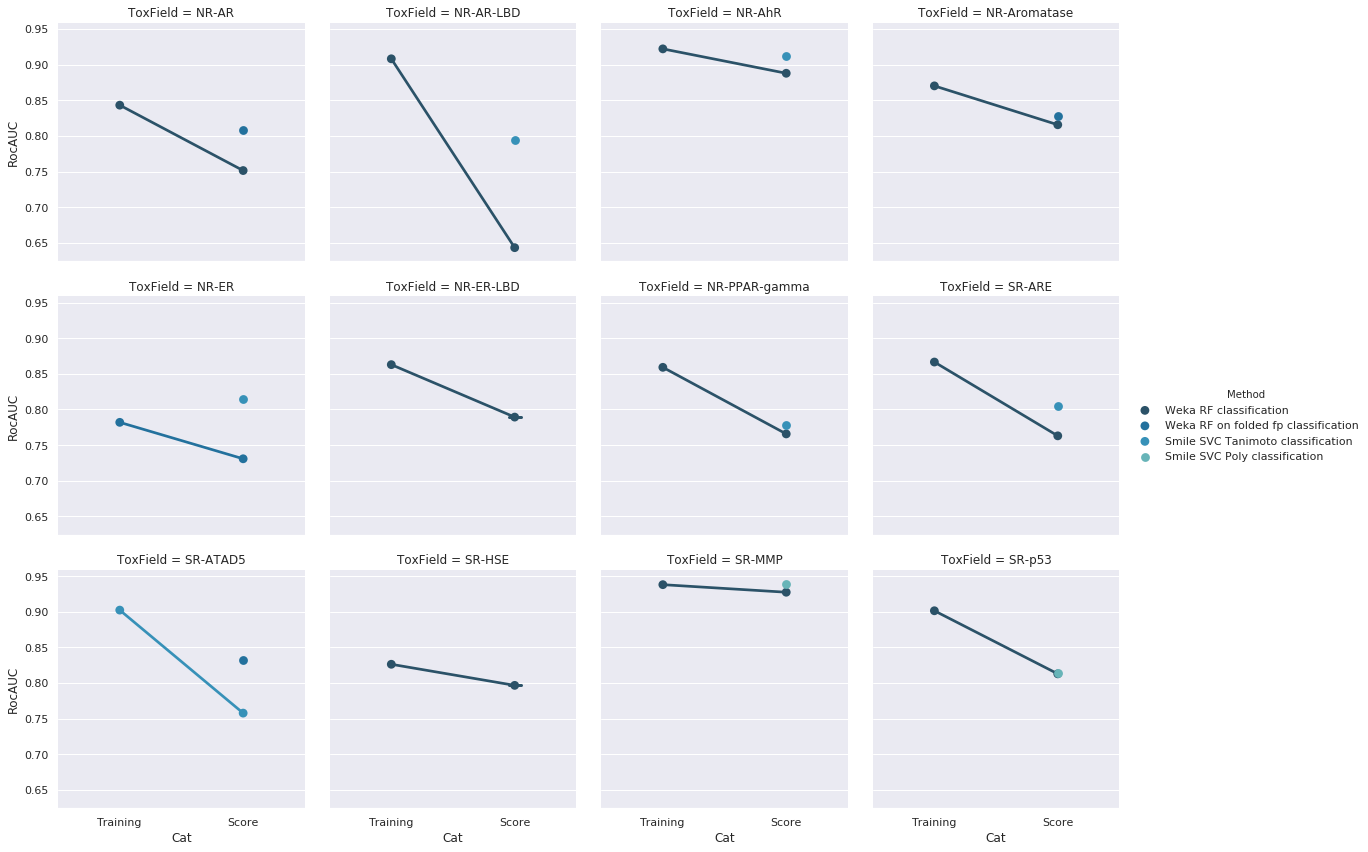

In [397]:
g = sns.catplot(x="Cat", y="RocAUC", hue="Method", col="ToxField",
                capsize=0.1, palette="YlGnBu_d", height=4, aspect=1.0,
                kind="point", data=df, col_wrap=4)
g.despine(left=True)